# Фокусировка пучков заряженных частиц
Здравствуйте. Сегодня мы собираемся необычным образом (правильным) выполнить все расчеты одной из Лабораторных работ из курса 14 кафедры университета НИЯУ МИФИ.

In [140]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # для создания путей папок для сохранения


In [141]:
# Функция для создания матрицы L от числа z
def L(z): 
    return np.array([[1,z],[0,1]])

#x_i
# Функция для разделения слова на отдельные буквы списком
def typeofl(word):
    type_sys=list(word)
    return type_sys

def focus(word, pictures=False,Ffok=5,Fdef=5,d=6,s1=6,s2=6):
    '''
    Ffok - Фокусное расстояние фокусирующей линзы, м
    Fdef - Фокусное расстояние дефокусирующей линзы, м
    d - Расстояние между линзами, м
    s1 - Пролетный промежуток до линзы, м
    s2 - Пролетный промежуток после линзы, м
    Чтобы поменять стандартные значения при фиксировании, измените их при определении самой функции focus (см Выше)
    '''

    #Матрицы пролётного промежутка и линз
    Mf=np.array([[1,0],[-1/Ffok,1]])
    Md=np.array([[1,0],[1/Fdef,1]])
    #print(Mf,'\n\n',Md)

    #Начальные условия
    xmax=0.01 #м
    dxmax=0.001 #рад
    n=100
    x_i=[]
    for i in range(n):
        x_i_i=[xmax*(math.cos(i*2*math.pi/n)) ,dxmax*(math.sin(i*2*math.pi/n))]
        x_i.append(x_i_i)
    x_i=np.array(x_i)

    data=pd.DataFrame(x_i,columns = ['xi','xi`'])
    #print(data.head())

    type_list=typeofl(word.upper())
    

    # Если хочется выводить графики
    if pictures:
        print(f'Система линз {type_list} Создана. Расчет значений:\n') # Пафосную фразу чтобы круче выглядело
        sns.set_style('darkgrid') # Для лучшей видимости изменим стиль
        f= plt.figure(figsize=(8,34)) # Размер subplot-а
        num_1=9 
        num_2=2
        num_3=1
        sub=100*num_1+10*num_2+num_3 #метод разбиения если вдруг захотите вывести большую систему типа ФОДОФОДОФО
        ax = f.add_subplot(sub)
        sns.scatterplot(x='xi', y='xi`', ax=ax, data=data)
        plt.title('Входные значения') # Начальный график сразу нарисуем

    
    for i in range(len(type_list)):
        if type_list[i]=='О' and i==0:
            matric=L(s1)
        elif type_list[i]=='О' and i==len(type_list)-1:
            matric=L(s2)
        elif type_list[i]=='Ф':
            matric=Mf
        elif type_list[i]=='Д':
            matric=Md    
        else:
            matric=L(d)
        matric=np.array(matric) # Определяем, какую матрицу на каждом этапе нужно использовать


        
        x_q=[]
        for q in range(n): # Перемножение матриц
            x_i_trans=x_i[q]
            #x_i_trans=np.vstack(x_i_trans)
            # x_i_trans=np.transpose(x_i_trans)
            
            x_q.append(np.matmul(matric,x_i_trans))
            # if q==0:
            #     #print(f'Давайте проверим, что перемножение матриц правильное')
            #     print(f" Умножим матрицу \n{matric} на \n{x_i_trans}  \nБыла матрица {x_i[q]}, а стала {x_q[q]}")
            #     #print('\n')
        x_q=np.array(x_q)
        x_i=x_q
        title='x'+str(i)
        title_='x'+str(i)+'`'
        data[title]=x_q[:,0] # Закидываем в дату с x и x' значения
        data[title_]=x_q[:,1] # Закидываем в дату с x и x' значения


        if pictures:
            num_3=i+2 # Сразу понятно, что этим методом можно вывести только до 8-сложной системы, дальше поплывет subplot
            sub=100*num_1+10*num_2+num_3
            #print(sub)
            ax = f.add_subplot(sub)
            plt_title='Система '+str(type_list[:i+1])
            plt.title(plt_title)
            sns.scatterplot(x='xi', y='xi`', ax=ax, data=data) #рисуем на каждом этапе начальный график отдельно
            
            for q in range(i+1):
                sns.scatterplot(x='x'+str(q), y='x'+str(q)+'`', ax=ax, data=data) # Вставляем все изменения как в лабе показывались
                # if q==i:
                #     zet=[max(x_q[:,0]),max(x_q[:,1])]
                #     print(zet)

    #print(data.head())
    max_list=max(x_q[:,0])
    max_list_=max(x_q[:,1])
    last_list=[max_list,max_list_] 
    # print(x_q[:,0])
    # print(x_q[:,1])
    return last_list; # возвращаем два числа из функции - x и x' , - Причем максимальные значения.




Система линз ['Ф', 'О', 'Д', 'О', 'Ф', 'О'] Создана. Расчет значений:

Макс x: 0.01453439580371451
Макс x`: 0.0018610861884814462


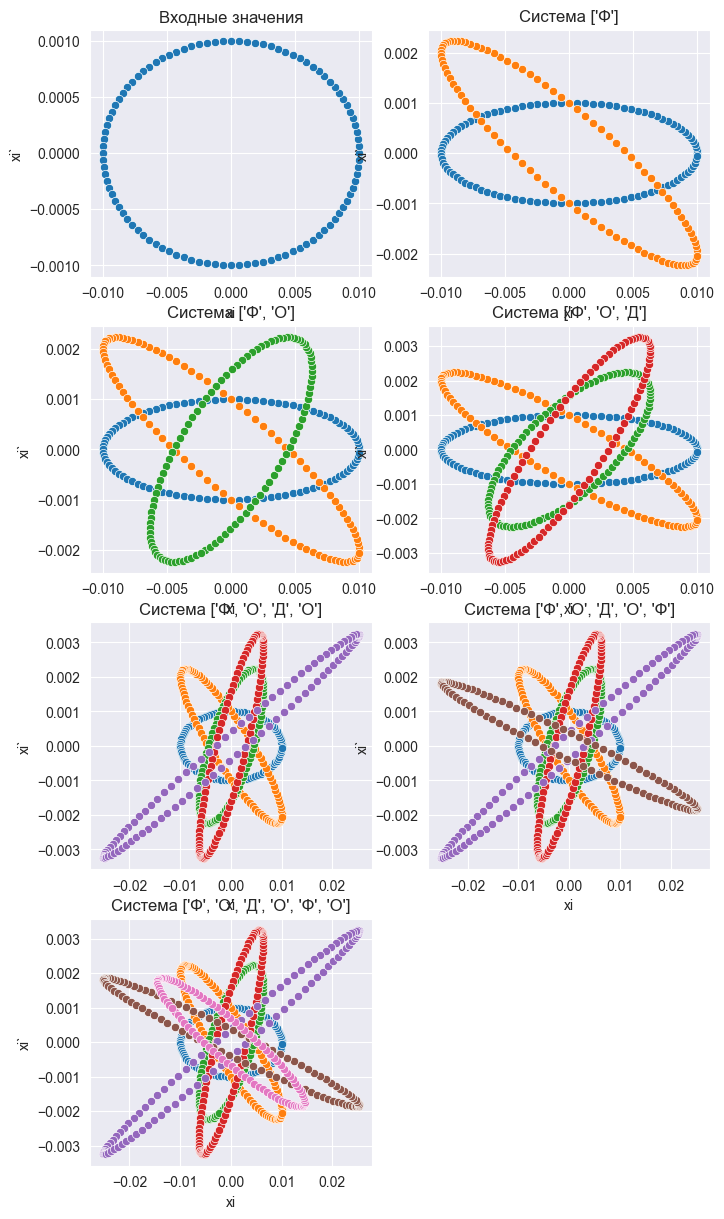

In [142]:
''' 
Проверим работоспособность программы!
Напишите снизу какую-нибудь систему
'''
Say='фодофо'

max_list=focus(word=Say,pictures=True)
print(f"Макс x: {max_list[0]}\nМакс x`: {max_list[1]}")


In [143]:
# Функция экспорта
def my_export(Title='output.xlsx', show=True):

    ''' 
    Автоматизируем процесс построения таблиц.
    Создадим для начала все списки, как и что будет меняться, если нужно поменять
    '''
    for_list=np.arange(2,10,0.5, dtype=float)

    Ffok_list=for_list
    Fdef_list=for_list
    d_list=for_list
    s1_list=for_list
    s2_list=for_list
    word_list=['ОФО','ОДО','фодо','дофо','фодофо','офодо','фофододо'] # ВАЖНО! Впишите названия систем, которые вы хотите рассчитать. 
    #Можно писать и маленькими буквами, дальше есть защита от этого
    # Ffok_list=[1,3,5,7,9]
    # Fdef_list=[1,3,5,7,9]
    # d_list=[1,3,6,8,10]
    # s1_list=[1,3,6,8,10]
    # s2_list=[1,3,6,8,10]
    
    dic = {}
    dic2 = {} # Для обнуления библиотек при каждом запуске (на всякий случай добавил, можно и убрать)
    import warnings
    warnings.filterwarnings('ignore') # Добавил тк без этого будет выводиться надпись, что в будущем метод pd.append не будет использоваться

    for word in word_list:
        word=word.upper() # Защита от дебила, который написал что-то с маленькой буквы
        type_list=typeofl(word) # Разделяем слово по буквам

        dic[word] = pd.DataFrame(columns=["Change","Value","x","x`"]) # Создаем отдельный датасет для системы линз с такими вот колонками
        ''' 
        Дальше идет циклический вызов функции нахождения максимума с созданием строки датасета, который вклинивается в датасет для текущей системы

        '''
        for i in range(len(word)):
            if type_list[i]=='О' and i==0:
                for s1 in s1_list:
                    max_list=focus(word=word, s1=s1)
                    dic2=pd.DataFrame({"Change":['s1'],"Value":[s1],"x":[max_list[0]],"x`":[max_list[1]] })
                    dic[word]=dic[word].append(dic2, ignore_index= True)
            elif type_list[i]=='О' and i==len(type_list)-1:
                for s2 in s2_list:
                    max_list=focus(word=word, s2=s2)
                    dic2=pd.DataFrame({"Change":['s2'],"Value":[s2],"x":[max_list[0]],"x`":[max_list[1]] })
                    dic[word]=dic[word].append(dic2, ignore_index= True)
            elif type_list[i]=='Ф':
                for Ffok in Ffok_list:
                    max_list=focus(word=word, Ffok=Ffok)
                    dic2=pd.DataFrame({"Change":['Ffok'],"Value":[Ffok],"x":[max_list[0]],"x`":[max_list[1]] })
                    dic[word]=dic[word].append(dic2, ignore_index= True)
            elif type_list[i]=='Д':
                for Fdef in Fdef_list:
                    max_list=focus(word=word, Fdef=Fdef)
                    dic2=pd.DataFrame({"Change":['Fdef'],"Value":[Fdef],"x":[max_list[0]],"x`":[max_list[1]] })
                    dic[word]=dic[word].append(dic2, ignore_index= True)
            else:
                for d in d_list:
                    max_list=focus(word=word, d=d)
                    dic2=pd.DataFrame({"Change":['d'],"Value":[d],"x":[max_list[0]],"x`":[max_list[1]] })
                    dic[word]=dic[word].append(dic2, ignore_index= True)
        #for Ffok in Ffok_list:
    if show:
        print('Пример вывода программы')
        print(dic[word_list[0]])
    from openpyxl import Workbook 
    # Добавляем библиотеку для записи в Excel с изменением названий листов
    with pd.ExcelWriter(Title) as writer:  
        for name, df in dic.items():
            sheet_name='Система #'+str(name)
            df.to_excel(writer, sheet_name=sheet_name)

    ''' 
    Построим графики для каждой системы
    '''
    for name, df in dic.items():
        f,ax = plt.subplots(1,2,figsize=(14,6))
        sns.lineplot(x='Value',y='x',data=df,palette='magma',hue='Change', ax=ax[0]).set(title=f'x системы {name}')
        sns.lineplot(x='Value',y='x`',data=df,palette='magma', hue='Change',ax=ax[1]).set(title=f'x` системы {name}')
        png_name='Система #'+str(name)+'.png'
        png_path='output_images/'
        png_name=png_path+png_name
        plt.savefig(png_name)



Пример вывода программы
   Change  Value         x        x`
0      s1    2.0  0.005944  0.002088
1      s1    2.5  0.005850  0.002062
2      s1    3.0  0.005757  0.002040
3      s1    3.5  0.005664  0.002022
4      s1    4.0  0.005571  0.002009
5      s1    4.5  0.005478  0.002002
6      s1    5.0  0.005385  0.002000
7      s1    5.5  0.005292  0.002002
8      s1    6.0  0.005199  0.002009
9      s1    6.5  0.005106  0.002022
10     s1    7.0  0.005014  0.002040
11     s1    7.5  0.004923  0.002062
12     s1    8.0  0.004833  0.002088
13     s1    8.5  0.004742  0.002118
14     s1    9.0  0.004652  0.002154
15     s1    9.5  0.004561  0.002193
16   Ffok    2.0  0.020875  0.005385
17   Ffok    2.5  0.014202  0.004237
18   Ffok    3.0  0.010000  0.003479
19   Ffok    3.5  0.007345  0.002945
20   Ffok    4.0  0.005829  0.002549
21   Ffok    4.5  0.005207  0.002246
22   Ffok    5.0  0.005199  0.002009
23   Ffok    5.5  0.005528  0.001820
24   Ffok    6.0  0.006000  0.001667
25   Ffok    6

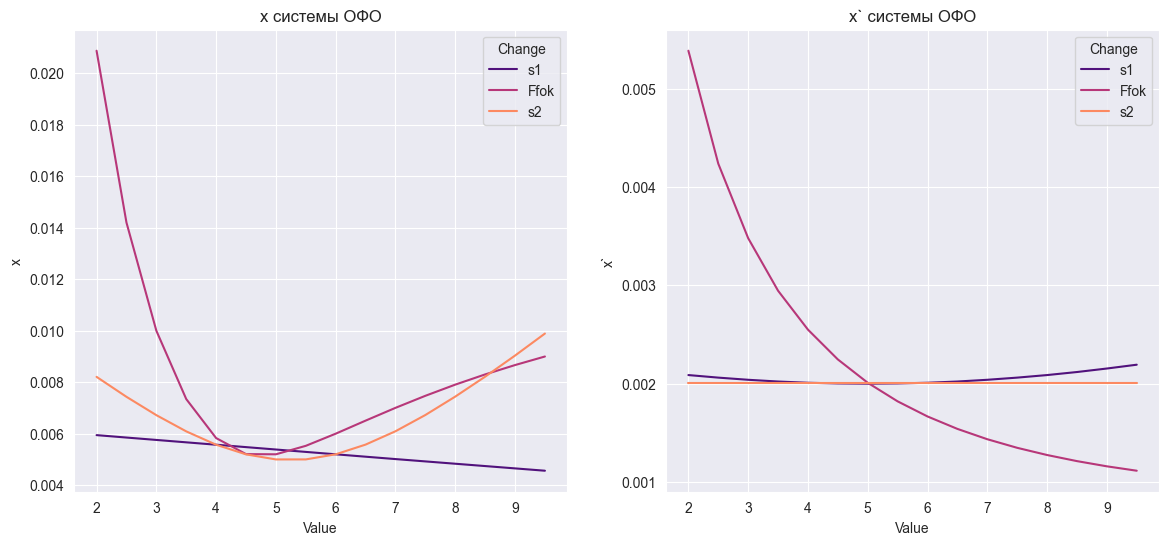

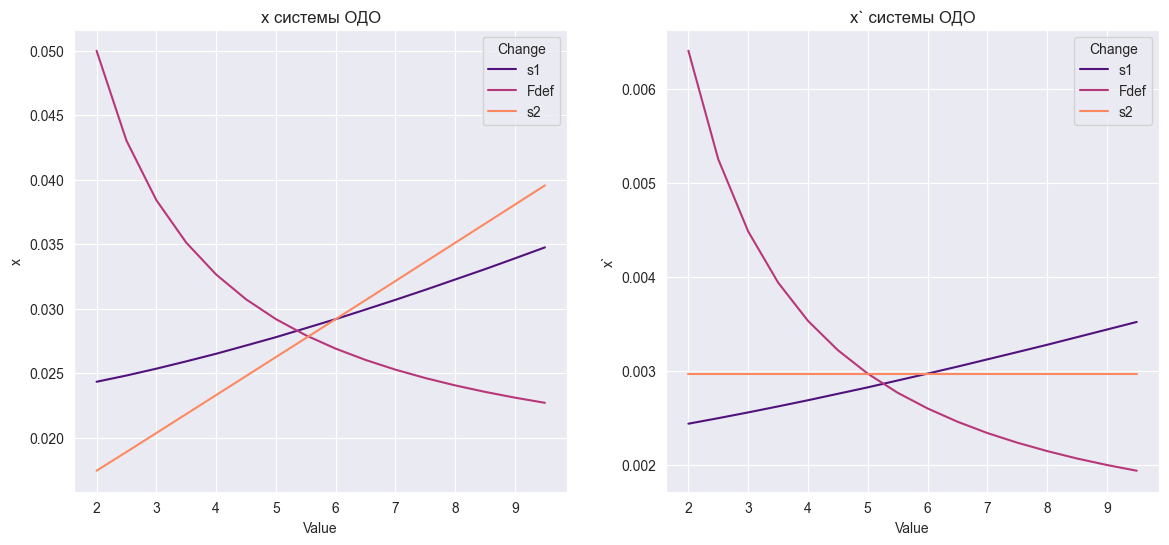

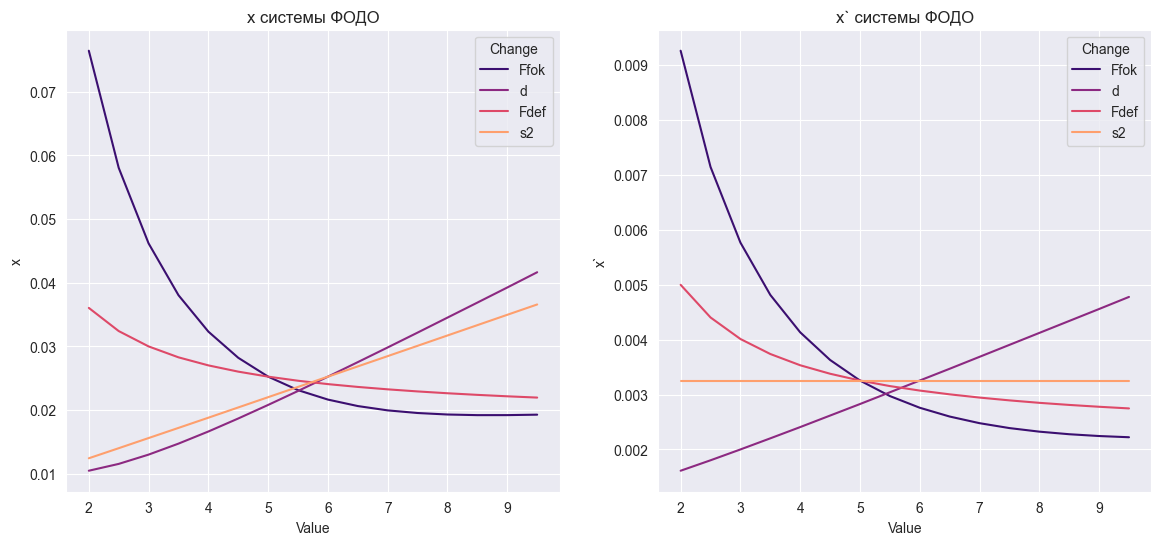

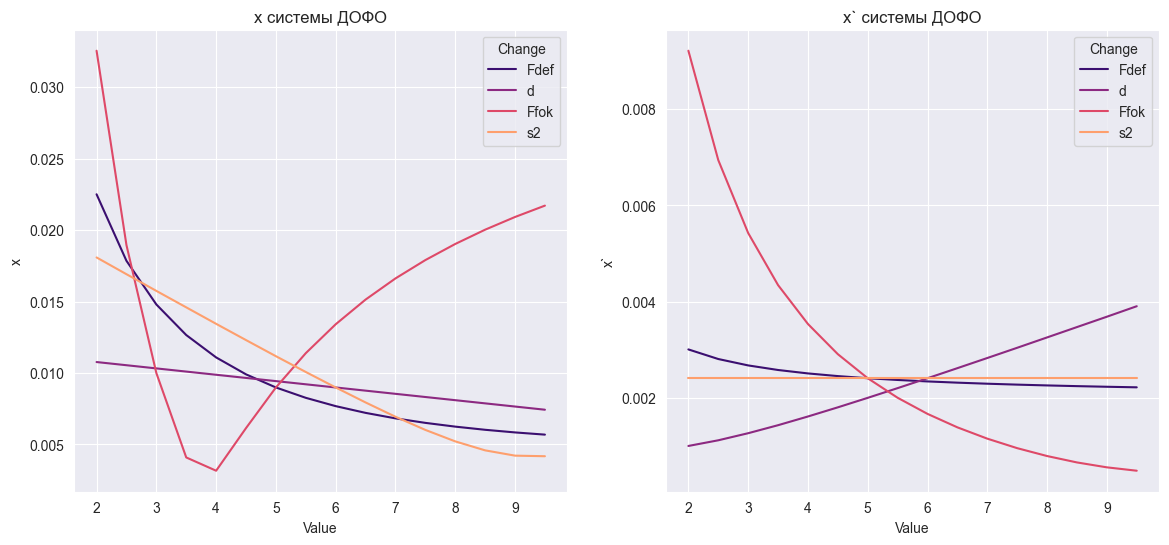

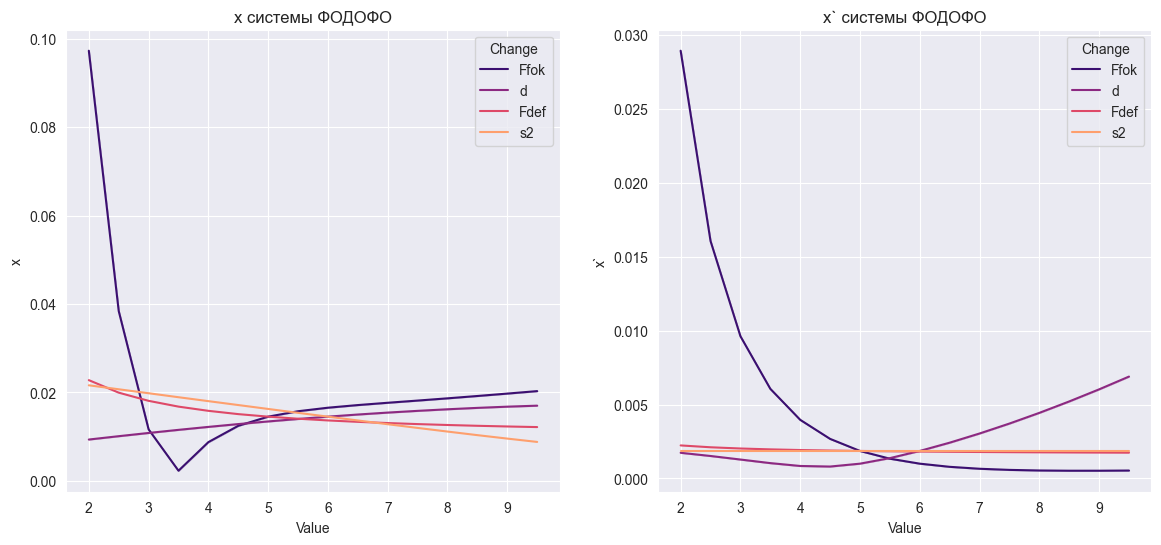

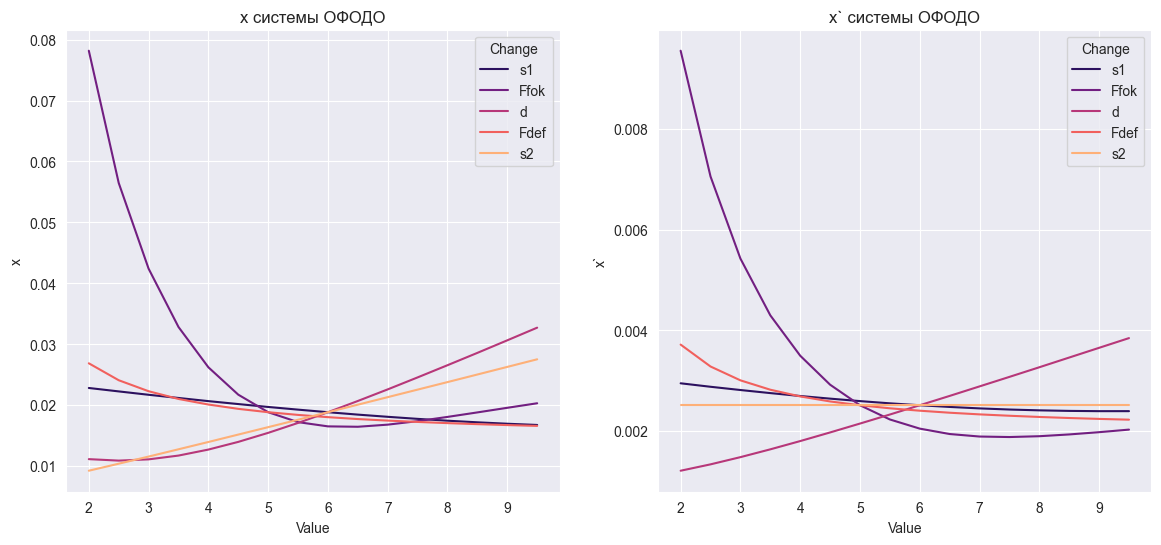

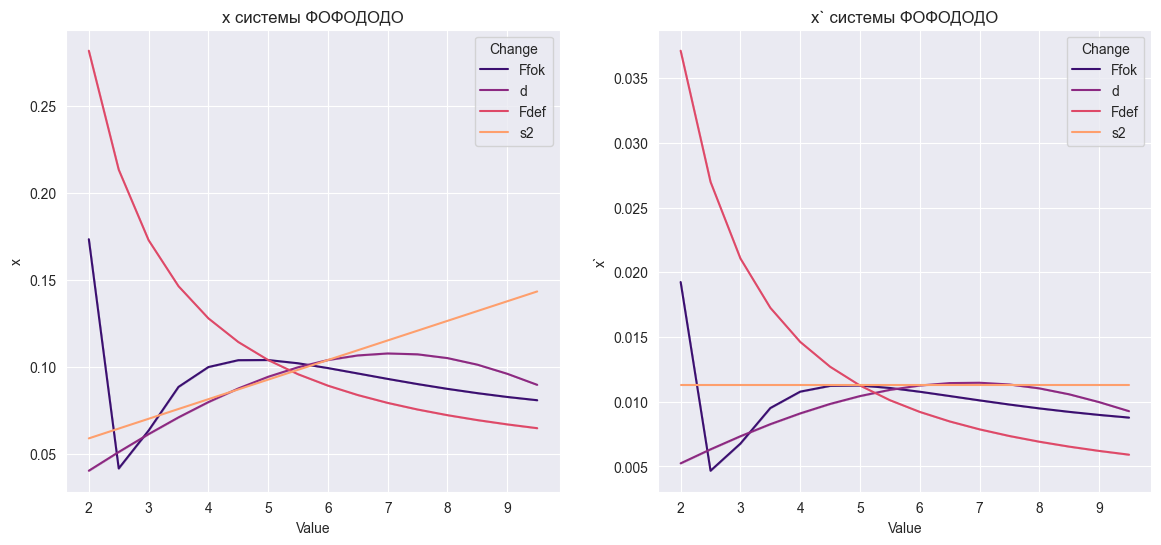

In [144]:
my_export(Title='output.xlsx', show=True)

Система линз ['Д', 'О', 'Ф', 'О'] Создана. Расчет значений:

Макс x: 0.008988860849714496
Макс x`: 0.0024078222521337145


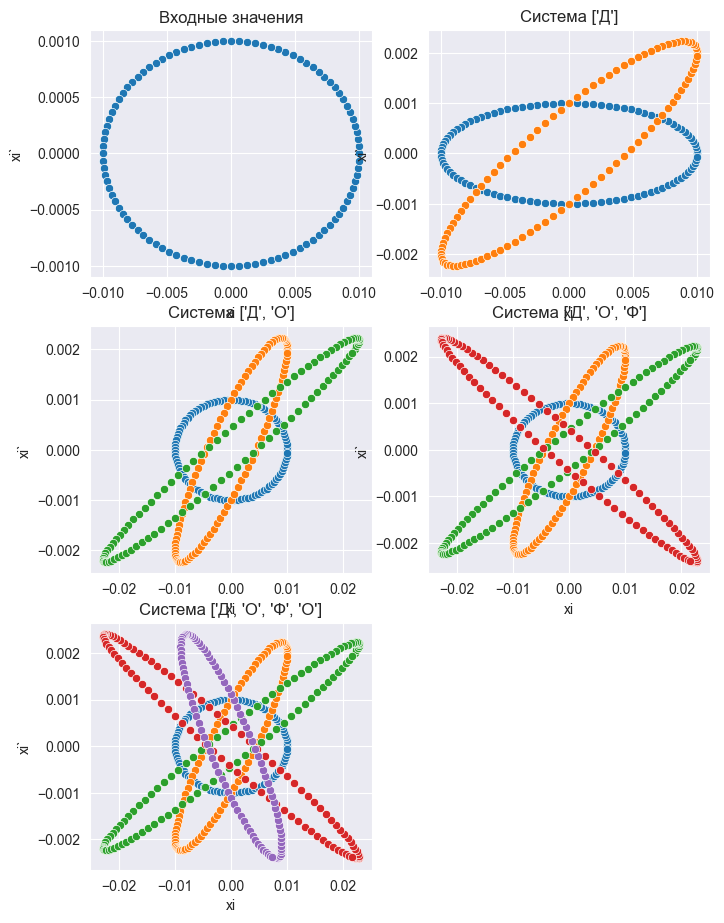

In [145]:
''' 
В качестве доказательства того, что предположение в 3-ем задании насчет равенстве систем ДОФО и ФОДО, давайте 
рассмотрим графики переходов при одинаковых (стандартных) значениях
'''

max_list=focus(word='дофо',pictures=True)

print(f"Макс x: {max_list[0]}\nМакс x`: {max_list[1]}")

Система линз ['Ф', 'О', 'Д', 'О'] Создана. Расчет значений:

Макс x: 0.025247607693173666
Макс x`: 0.003255528338854503


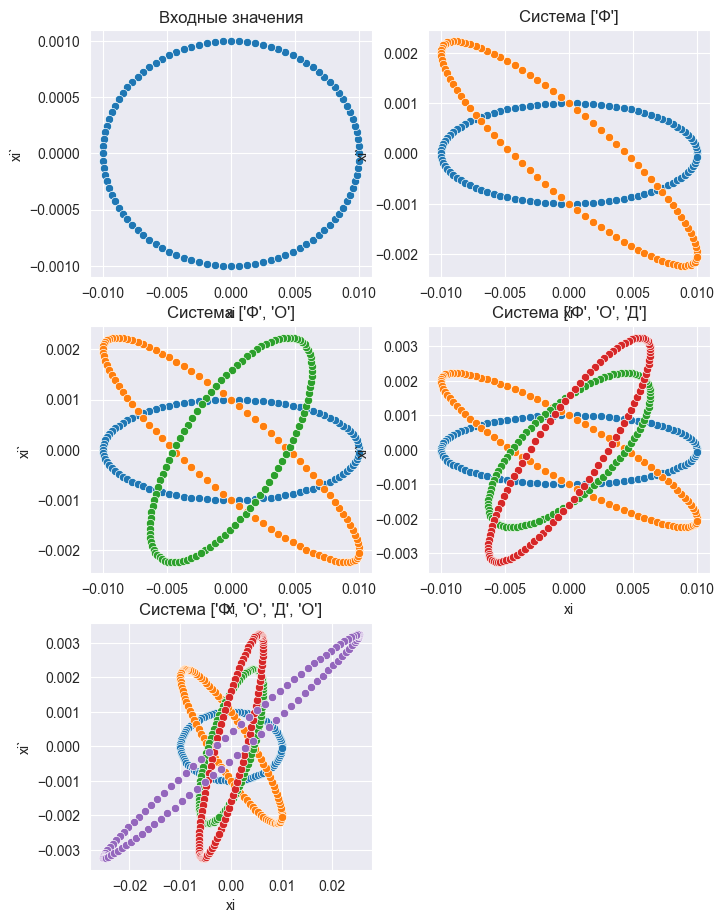

In [146]:
max_list=focus(word='фодо',pictures=True)

print(f"Макс x: {max_list[0]}\nМакс x`: {max_list[1]}")

In [147]:
def period(word, pictures=False,d=6,s=2,floke=0,F=5):
    '''
    Ffok - Фокусное расстояние фокусирующей линзы, м
    Fdef - Фокусное расстояние дефокусирующей линзы, м
    d - Период системы линз, м
    s - Начальный Пролетный промежуток до линзы, м
    Чтобы поменять стандартные значения при фиксировании, измените их при определении самой функции focus (см Выше)
    '''
    Fdef=F
    Ffok=F
    #Матрицы пролётного промежутка и линз
    Mf=np.array([[1,0],[-1/Ffok,1]])
    Md=np.array([[1,0],[1/Fdef,1]])
    #print(Mf,'\n\n',Md)

    #Начальные условия
    xmax=0.01 #м
    dxmax=0.001 #рад
    n=100
    x_i=[]
    for i in range(n):
        x_i_i=[xmax*(math.cos(i*2*math.pi/n)) ,dxmax*(math.sin(i*2*math.pi/n))]
        x_i.append(x_i_i)
    x_i=np.array(x_i)

    data=pd.DataFrame(x_i,columns = ['xi','xi`'])
    #print(data.head())

    type_list=typeofl(word.upper())




    # Если хочется выводить графики
    if pictures:
        print(f'Система линз {type_list} Создана. Расчет значений:\n') # Пафосную фразу чтобы круче выглядело
        sns.set_style('darkgrid') # Для лучшей видимости изменим стиль
        f= plt.figure(figsize=(8,34)) # Размер subplot-а
        num_1=9 
        num_2=2
        num_3=1
        sub=100*num_1+10*num_2+num_3 #метод разбиения если вдруг захотите вывести большую систему типа ФОДОФОДОФО
        ax = f.add_subplot(sub)
        sns.scatterplot(x='xi', y='xi`', ax=ax, data=data)
        plt.title('Входные значения.') # Начальный график сразу нарисуем
    assert word.upper()=="ФОФО" or "ФОДО", "Рассматриваются только две периодические системы: ФОФО и ФОДО"

    if floke!=0:
        if pictures:
            print(f"Параметр Флоке задан: {floke}")

        #Посчитаем расстояние между линзами, если Флоке задан изначально (для задания 7)
        if word.upper()=="ФОФО":
            d=(1-math.cos(floke))*2*F
        if word.upper()=="ФОДО":
            d=math.sqrt((1-math.cos(floke))*8*F**2)
        if pictures:
            print(f'Тогда параметр d можно посчитать. d = {d}')

    if 0<d/F<4:
        condition='выполняется'
    else:
        condition='не выполняется'
    if pictures:
        print(f'Проверим условие фокусировки.\n0<{d/F}<4 - {condition}')

    if word.upper()=="ФОФО":
        assert s<d, f"В системе ФОФО значение s={s} должно быть меньше d={d}"
        ''' 
        Посчитаем конечную матрицу перехода 

        '''    
        matric_full=np.matmul(L(s),np.matmul(Mf,L(d-s)))
        shpour=np.trace(matric_full)
        if pictures:
            print(f" Вот есть матрица перехода\n{matric_full}\nШпур у нее равен : {shpour}")

        if floke==0:
            floke=math.acos(shpour/2)
            if pictures:
                print(f"Параметр Флоке : {floke}")

        betta=matric_full[0,1]/math.sin(floke)
        if pictures:
            print(f"Параметр бетта : {betta}")

        
        for i in range(len(type_list)-1):
            if i==0:
                matric=L(d-s)
            if i==1:
                matric=Mf
            if i==2:
                matric=L(s)
            matric=np.array(matric) # Определяем, какую матрицу на каждом этапе нужно использовать

            x_q=[]
            for q in range(n): # Перемножение матриц
                x_i_trans=x_i[q]
                #x_i_trans=np.vstack(x_i_trans)
                # x_i_trans=np.transpose(x_i_trans)
                
                x_q.append(np.matmul(matric,x_i_trans))
                # if q==0:
                #     #print(f'Давайте проверим, что перемножение матриц правильное')
                #     print(f" Умножим матрицу \n{matric} на \n{x_i_trans}  \nБыла матрица {x_i[q]}, а стала {x_q[q]}")
                #     #print('\n')
            x_q=np.array(x_q)
            x_i=x_q
            title='x'+str(i)
            title_='x'+str(i)+'`'
            data[title]=x_q[:,0] # Закидываем в дату с x и x' значения
            data[title_]=x_q[:,1] # Закидываем в дату с x и x' значения


            if pictures:
                num_3=i+2 # Сразу понятно, что этим методом можно вывести только до 8-сложной системы, дальше поплывет subplot
                sub=100*num_1+10*num_2+num_3
                #print(sub)
                ax = f.add_subplot(sub)
                plt_title='Система '+str(type_list[:i+2])
                plt.title(plt_title)
                sns.scatterplot(x='xi', y='xi`', ax=ax, data=data) #рисуем на каждом этапе начальный график отдельно
                
                for q in range(i+1):
                    sns.scatterplot(x='x'+str(q), y='x'+str(q)+'`', ax=ax, data=data) # Вставляем все изменения как в лабе показывались
                    # if q==i:
                    #     zet=[max(x_q[:,0]),max(x_q[:,1])]
                    #     print(zet)


    if word.upper()=="ФОДО":
        assert s<d/2, f"В системе ФОДО значение s={s} должно быть меньше d/2={d/2}"
        ''' 
        Посчитаем конечную матрицу перехода 

        '''    
        matric_full=np.matmul(L(s),np.matmul(Md,np.matmul(L(d/2),np.matmul(Mf,L(d/2-s)))))
        shpour=np.trace(matric_full)
        if pictures:
            print(f" Вот есть матрица перехода\n{matric_full}\nШпур у нее равен : {shpour}")

        if floke==0:
            floke=math.acos(shpour/2)
            if pictures:
                print(f"Параметр Флоке : {floke}")

        betta=matric_full[0,1]/math.sin(floke)
        if pictures:
            print(f"Параметр бетта : {betta}")



        for i in range(len(type_list)+1):
            if i==0:
                matric=L(d/2-s)
            if i==1:
                matric=Mf
            if i==2:
                matric=L(d/2)
            if i==3:
                matric=Md
            if i==4:
                matric=L(s)
            matric=np.array(matric) # Определяем, какую матрицу на каждом этапе нужно использовать

            x_q=[]
            for q in range(n): # Перемножение матриц
                x_i_trans=x_i[q]
                #x_i_trans=np.vstack(x_i_trans)
                # x_i_trans=np.transpose(x_i_trans)
                
                x_q.append(np.matmul(matric,x_i_trans))
                # if q==0:
                #     #print(f'Давайте проверим, что перемножение матриц правильное')
                #     print(f" Умножим матрицу \n{matric} на \n{x_i_trans}  \nБыла матрица {x_i[q]}, а стала {x_q[q]}")
                #     #print('\n')
            x_q=np.array(x_q)
            x_i=x_q
            title='x'+str(i)
            title_='x'+str(i)+'`'
            data[title]=x_q[:,0] # Закидываем в дату с x и x' значения
            data[title_]=x_q[:,1] # Закидываем в дату с x и x' значения


            if pictures:
                num_3=i+2 # Сразу понятно, что этим методом можно вывести только до 8-сложной системы, дальше поплывет subplot
                sub=100*num_1+10*num_2+num_3
                #print(sub)
                ax = f.add_subplot(sub)
                if i<1:
                    plt_title='Система ФОДО'
                else:
                    plt_title='Система '+str(type_list[:i])
                plt.title(plt_title)
                sns.scatterplot(x='xi', y='xi`', ax=ax, data=data) #рисуем на каждом этапе начальный график отдельно
                
                for q in range(i+1):
                    sns.scatterplot(x='x'+str(q), y='x'+str(q)+'`', ax=ax, data=data) # Вставляем все изменения как в лабе показывались
                    # if q==i:
                    #     zet=[max(x_q[:,0]),max(x_q[:,1])]
                    #     print(zet)
                
    #print(data.head())
    max_list=max(x_q[:,0])
    max_list_=max(x_q[:,1])
    last_list=[max_list,max_list_] 
    # print(x_q[:,0])
    # print(x_q[:,1])
    return last_list; # возвращаем два числа из функции - x и x' , - Причем максимальные значения.


Система линз ['Ф', 'О', 'Ф', 'О'] Создана. Расчет значений:

Проверим условие фокусировки.
0<1.2<4 - выполняется
 Вот есть матрица перехода
[[ 0.4  4.2]
 [-0.2  0.4]]
Шпур у нее равен : 0.7999999999999998
Параметр Флоке : 1.1592794807274087
Параметр бетта : 4.582575694955839
Система линз ['Ф', 'О', 'Ф', 'О'] Создана. Расчет значений:

Проверим условие фокусировки.
0<1.2<4 - выполняется
 Вот есть матрица перехода
[[-5.55111512e-17  5.00000000e+00]
 [-2.00000000e-01  8.00000000e-01]]
Шпур у нее равен : 0.8
Параметр Флоке : 1.1592794807274085
Параметр бетта : 5.455447255899809


[0.005, 0.0021540526139242453]

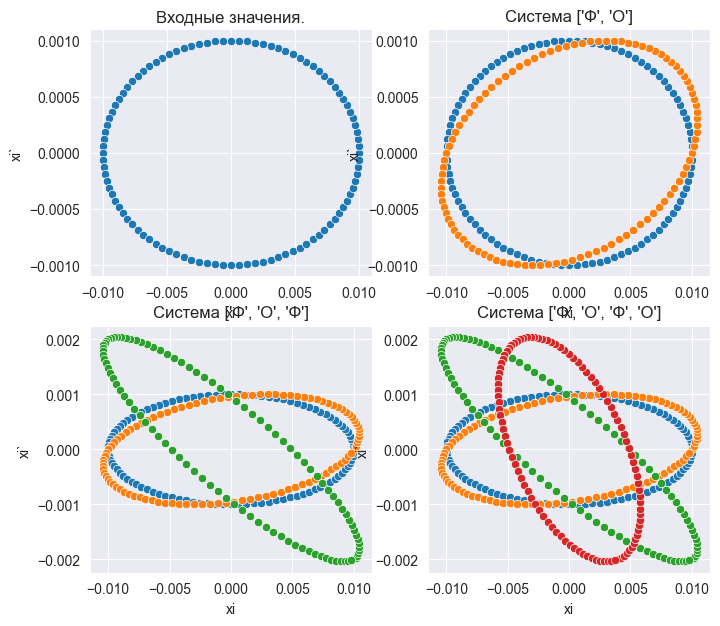

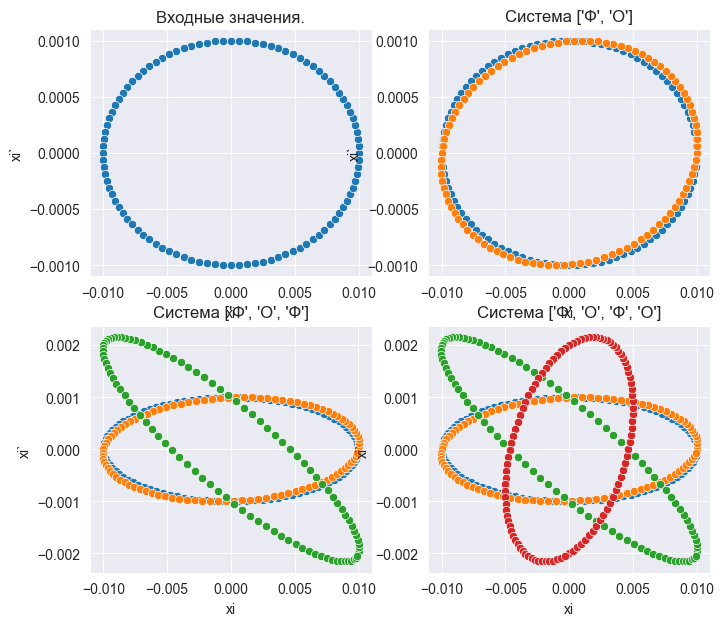

In [148]:
#Задание 5.а
Say='фофо'
period(Say,pictures=True, d=6,s=3) # В одном задании нужно покрутить значение s, чтобы убедиться, что шпур не зависит от него
period(Say,pictures=True, d=6,s=5)

Система линз ['Ф', 'О', 'Ф', 'О'] Создана. Расчет значений:

Параметр Флоке задан: 1.0471975511965976
Тогда параметр d можно посчитать. d = 0.9999999999999998
Проверим условие фокусировки.
0<0.9999999999999998<4 - выполняется
 Вот есть матрица перехода
[[ 0.7   0.79]
 [-1.    0.3 ]]
Шпур у нее равен : 1.0000000000000002
Параметр бетта : 0.9122134253196086


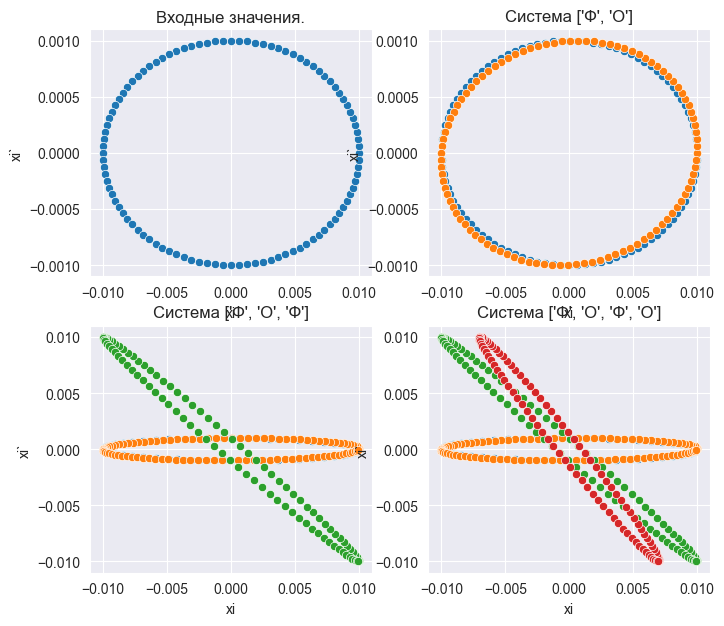

In [149]:
# Задание 5.б
Say='фофо'

floke=math.pi/3
F=1
s=0.3
#s=1.99   #Проверить и показать

max_list=period(Say,pictures=True,s=s,floke=floke,F=F)

In [150]:
def betta_func(floke,F,word,variant):
    '''
    Ffok - Фокусное расстояние фокусирующей линзы, м
    Fdef - Фокусное расстояние дефокусирующей линзы, м
    d - Период системы линз, м
    s - Начальный Пролетный промежуток до линзы, м
    Чтобы поменять стандартные значения при фиксировании, измените их при определении самой функции focus (см Выше)
    '''
    Fdef=F
    Ffok=F
    #Матрицы пролётного промежутка и линз
    Mf=np.array([[1,0],[-1/Ffok,1]])
    Md=np.array([[1,0],[1/Fdef,1]])
    #print(Mf,'\n\n',Md)
    
    #Начальные условия
    num=4
    n=100*num
    type_list=typeofl(word.upper())
    assert word.upper()=="ФОФО" or "ФОДО", "Рассматриваются только две периодические системы: ФОФО и ФОДО"

    if word.upper()=="ФОФО":
        d=(1-math.cos(floke))*2*F
    if word.upper()=="ФОДО":
        d=math.sqrt((1-math.cos(floke))*8*F**2)

    if word.upper()=="ФОФО":
        s=[]
        betta=[]
        for i in range(n):
            s.append(i*d/n)
            assert s[i]<d, f"В системе ФОФО значение s={s} должно быть меньше d={d}"
            ''' 
            Посчитаем конечную матрицу перехода 

            '''    
            matric_full=np.matmul(L(s[i]),np.matmul(Mf,L(d-s[i])))
            shpour=np.trace(matric_full)
            betta.append(matric_full[0,1]/math.sin(floke))


    if word.upper()=="ФОДО":
        s=[]
        betta=[]
        for i in range(n):
            s.append(i*d/(2*n))    
            assert s[i]<d/2, f"В системе ФОДО значение s={s} должно быть меньше d/2={d/2}"
            ''' 
            Посчитаем конечную матрицу перехода 

            '''    
            matric_full=np.matmul(L(s[i]),np.matmul(Md,np.matmul(L(d/2),np.matmul(Mf,L(d/2-s[i])))))
            shpour=np.trace(matric_full)
            betta.append(matric_full[0,1]/math.sin(floke))
    
    s=np.array(s)
    betta=np.array(betta)
    plt.figure()
    plt.plot(s, betta)
    plt.title(f"Вариант {variant}. Зависимость бета-функции от пролетного расстояния")
    plt.xlabel("s")
    plt.ylabel('betta')

    png_name='betta(s).png'
    if word.upper()=="ФОФО":
        png_path='Варианты для задачи 5.б/'+str(variant)+'/'
    if word.upper()=="ФОДО":
        png_path='Варианты для задачи 6.г/'+str(variant)+'/'
    png_name=png_path+png_name
    plt.savefig(png_name)
    #table=np.dstack((s,betta))
    #print(table)
    
    

[[1.57079633 1.        ]
 [1.57079633 2.        ]
 [1.57079633 0.5       ]
 [1.04719755 1.        ]
 [1.04719755 2.        ]
 [1.04719755 0.5       ]
 [0.78539816 1.        ]
 [0.78539816 2.        ]
 [0.78539816 0.5       ]
 [0.52359878 1.        ]
 [0.52359878 2.        ]
 [0.52359878 0.5       ]
 [3.14159265 1.        ]
 [3.14159265 2.        ]
 [3.14159265 0.5       ]]


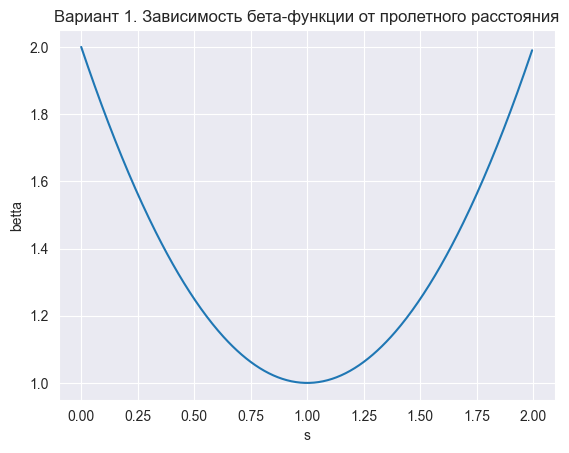

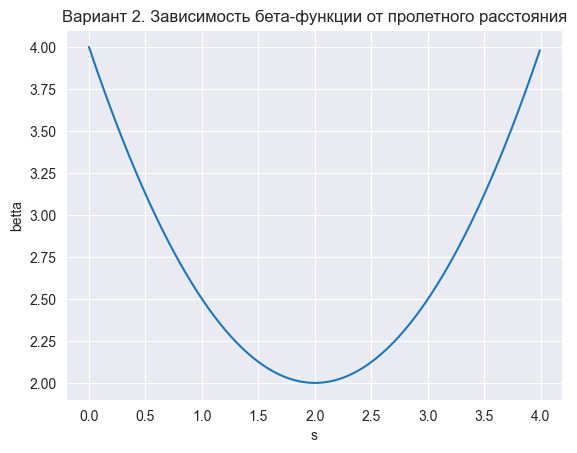

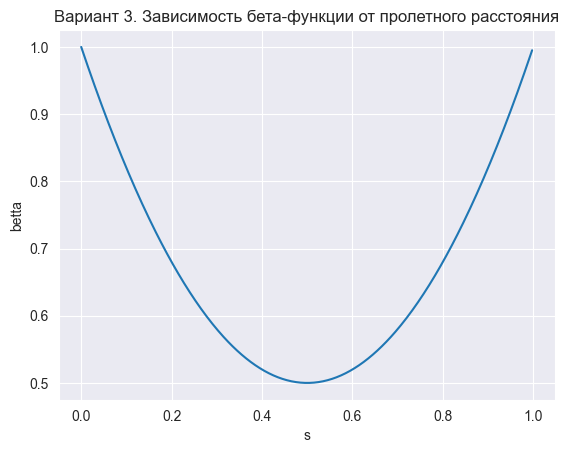

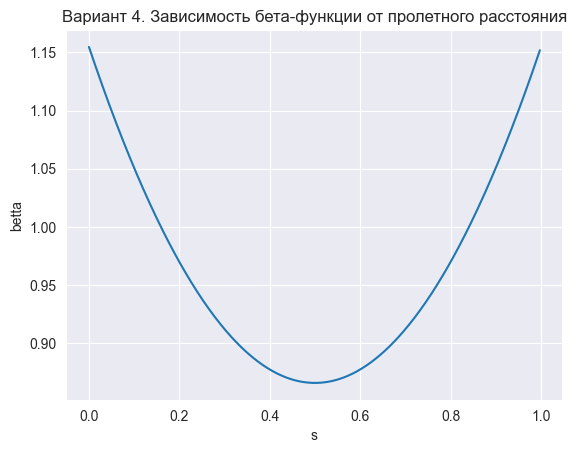

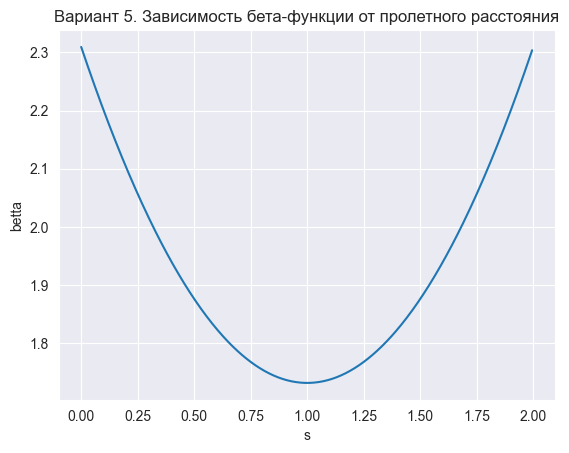

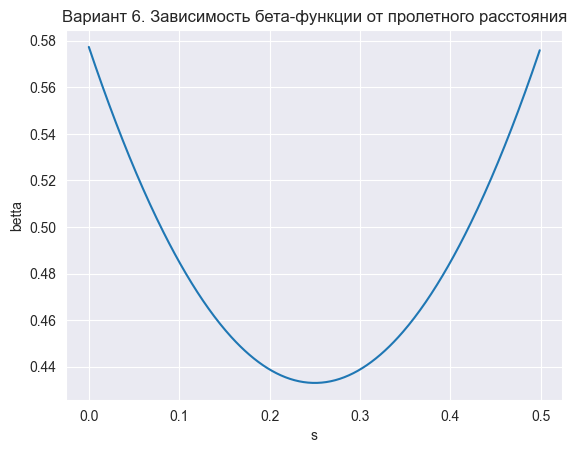

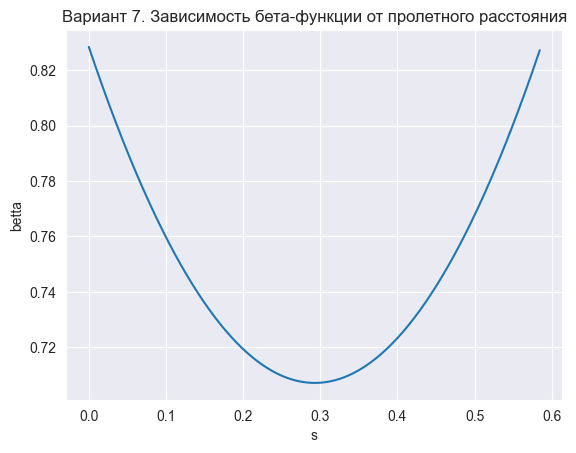

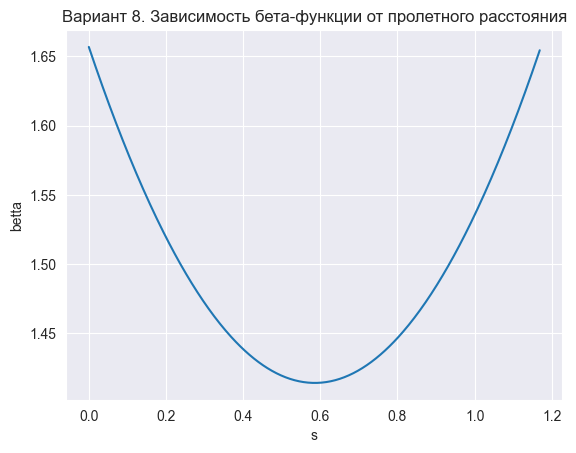

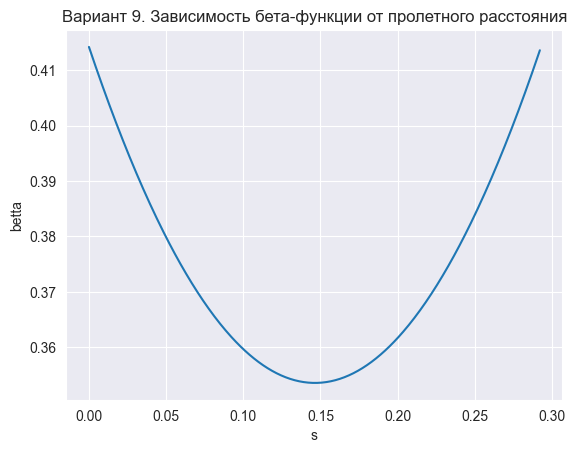

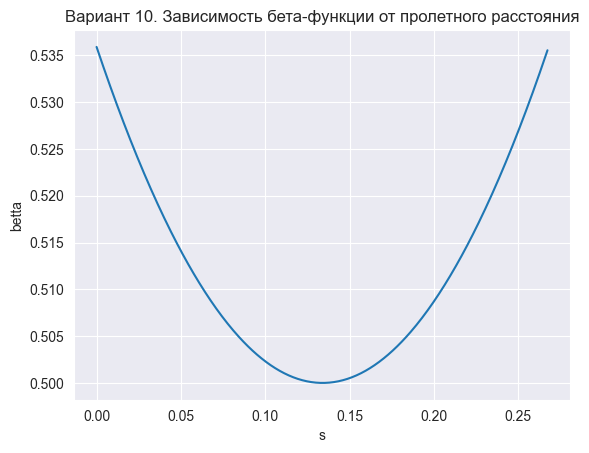

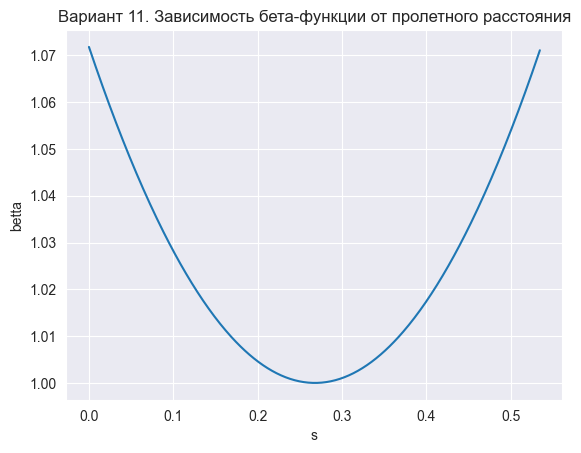

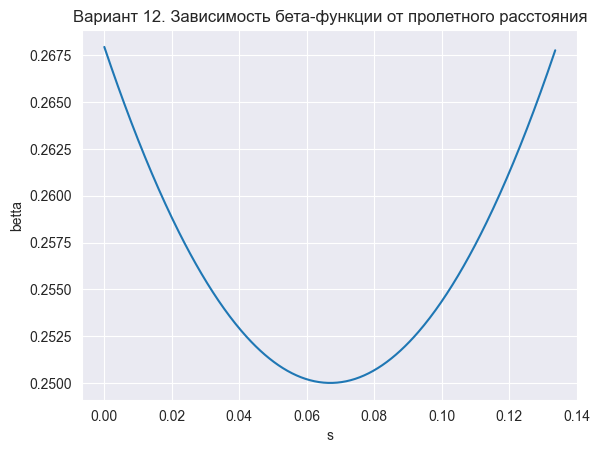

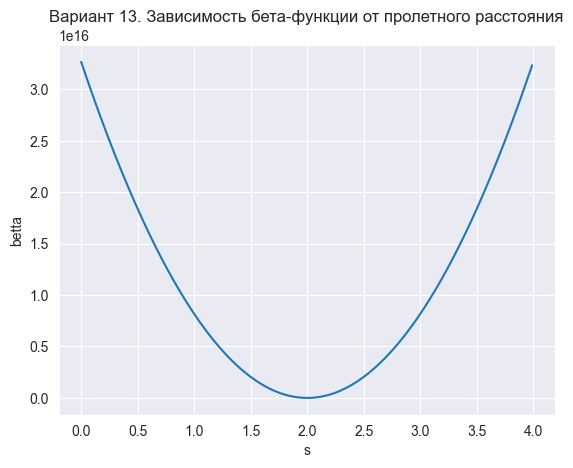

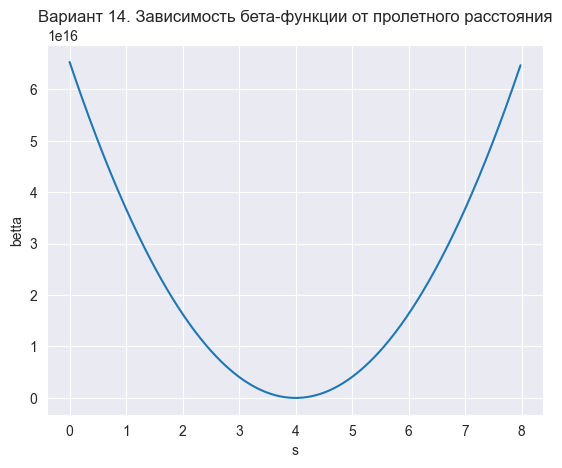

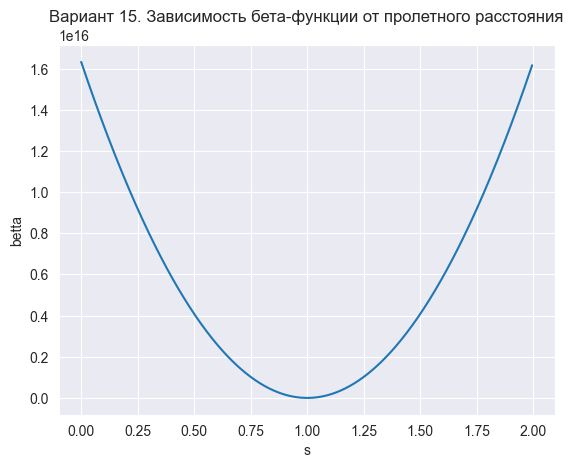

In [151]:
# Задание 5.б (автомат. подсчет)
# Сделать автоматический подсчет для всех вариантов
Variants=np.arange(30, dtype=float).reshape(15,2)

for i in range(15):
    if i<3:
        Variants[i][0]=math.pi/2
    elif i<6:
        Variants[i][0]=math.pi/3
    elif i<9:
        Variants[i][0]=math.pi/4
    elif i<12:
        Variants[i][0]=math.pi/6
    elif i<15:
        Variants[i][0]=math.pi
    
    if i%3==0:
        Variants[i][1]=1
    if i%3==1:
        Variants[i][1]=2
    if i%3==2:
        Variants[i][1]=0.5
print(Variants)
i=0
word='фофо'

''' 
Создадим папки от 1 до 15
'''
# png_path='Варианты для задачи 5.б/'
# for q in range(1,16):
#     os.mkdir(png_path+str(q))

    
for Floke,F in Variants:
    i+=1
    betta_func(Floke,F,word,i)
    


In [152]:
# Функция экспорта
def my_export_period(word, show=True):

    ''' 
    Автоматизируем процесс построения таблиц.
    Создадим для начала все списки, как и что будет меняться, если нужно поменять
    '''
    for_list=np.arange(2,10,0.5, dtype=float)

    F_list=for_list
    d_list=for_list
    s_list=for_list
    dic = {}
    dic2 = {} # Для обнуления библиотек при каждом запуске (на всякий случай добавил, можно и убрать)
    import warnings
    warnings.filterwarnings('ignore') # Добавил тк без этого будет выводиться надпись, что в будущем метод pd.append не будет использоваться
    word=word.upper() # Защита от дебила, который написал что-то с маленькой буквы
    type_list=typeofl(word) # Разделяем слово по буквам

    dic[word] = pd.DataFrame(columns=["Change","Value","x","x`"]) # Создаем отдельный датасет для системы линз с такими вот колонками
    ''' 
    Дальше идет циклический вызов функции нахождения максимума с созданием строки датасета, который вклинивается в датасет для текущей системы

    '''
    if word.upper()=='ФОДО':
        d=6
        s=2
        F=5
        for s in s_list:
            if s<d/2:
                max_list=period(word=word, s=s)
                dic2=pd.DataFrame({"Change":['s'],"Value":[s],"x":[max_list[0]],"x`":[max_list[1]] })
                dic[word]=dic[word].append(dic2, ignore_index= True)
        d=6
        s=2
        F=5
        for d in d_list:
            if s<d/2:
                max_list=period(word=word, d=d)
                dic2=pd.DataFrame({"Change":['d'],"Value":[d],"x":[max_list[0]],"x`":[max_list[1]] })
                dic[word]=dic[word].append(dic2, ignore_index= True)
        d=6
        s=2
        F=5
        for F in F_list:
            if s<d/2:
                max_list=period(word=word, F=F)
                dic2=pd.DataFrame({"Change":['F'],"Value":[F],"x":[max_list[0]],"x`":[max_list[1]] })
                dic[word]=dic[word].append(dic2, ignore_index= True)
    if word.upper()=='ФОФО':
        d=6
        s=2
        F=5
        for s in s_list:
            if s<d:
                max_list=period(word=word, s=s)
                dic2=pd.DataFrame({"Change":['s'],"Value":[s],"x":[max_list[0]],"x`":[max_list[1]] })
                dic[word]=dic[word].append(dic2, ignore_index= True)
        d=6
        s=2
        F=5
        for d in d_list:
            if s<d:
                max_list=period(word=word, d=d)
                dic2=pd.DataFrame({"Change":['d'],"Value":[d],"x":[max_list[0]],"x`":[max_list[1]] })
                dic[word]=dic[word].append(dic2, ignore_index= True)
        d=6
        s=2
        F=5
        for F in F_list:
            if s<d:
                max_list=period(word=word, F=F)
                dic2=pd.DataFrame({"Change":['F'],"Value":[F],"x":[max_list[0]],"x`":[max_list[1]] })
                dic[word]=dic[word].append(dic2, ignore_index= True)

    if show:
        print('Пример вывода программы')
        print(dic[word])

    ''' 
    Построим графики для каждой системы
    '''
    for name, df in dic.items():
        f,ax = plt.subplots(1,2,figsize=(14,6))
        sns.lineplot(x='Value',y='x',data=df,palette='magma',hue='Change', ax=ax[0]).set(title=f'x системы {name}')
        sns.lineplot(x='Value',y='x`',data=df,palette='magma', hue='Change',ax=ax[1]).set(title=f'x` системы {name}')
        png_name='Система #'+str(name)+'.png'
        png_path='period_images/'
        png_name=png_path+png_name
        plt.savefig(png_name)



Пример вывода программы
   Change  Value         x        x`
0       s    2.0  0.007440  0.002009
1       s    2.5  0.006562  0.002022
2       s    3.0  0.005800  0.002040
3       s    3.5  0.005202  0.002062
4       s    4.0  0.004833  0.002088
5       s    4.5  0.004755  0.002118
6       s    5.0  0.005000  0.002154
7       s    5.5  0.005541  0.002193
8       d    2.5  0.006425  0.002193
9       d    3.0  0.006536  0.002154
10      d    3.5  0.006664  0.002118
11      d    4.0  0.006799  0.002088
12      d    4.5  0.006944  0.002062
13      d    5.0  0.007102  0.002040
14      d    5.5  0.007264  0.002022
15      d    6.0  0.007440  0.002009
16      d    6.5  0.007619  0.002002
17      d    7.0  0.007810  0.002000
18      d    7.5  0.008002  0.002002
19      d    8.0  0.008207  0.002009
20      d    8.5  0.008413  0.002022
21      d    9.0  0.008627  0.002040
22      d    9.5  0.008846  0.002062
23      F    2.0  0.002000  0.005099
24      F    2.5  0.003441  0.004044
25      F    3

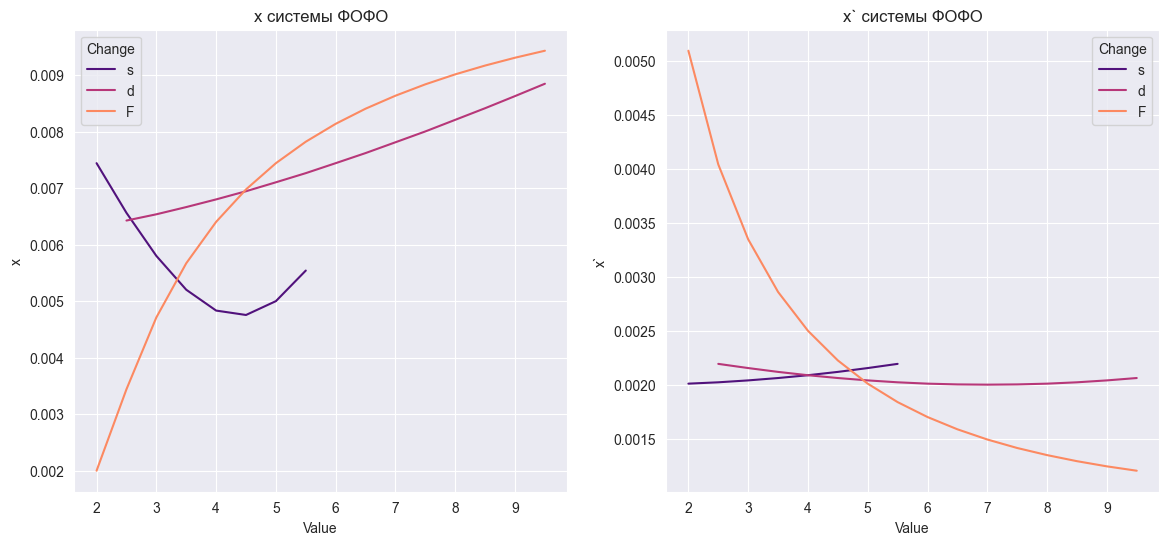

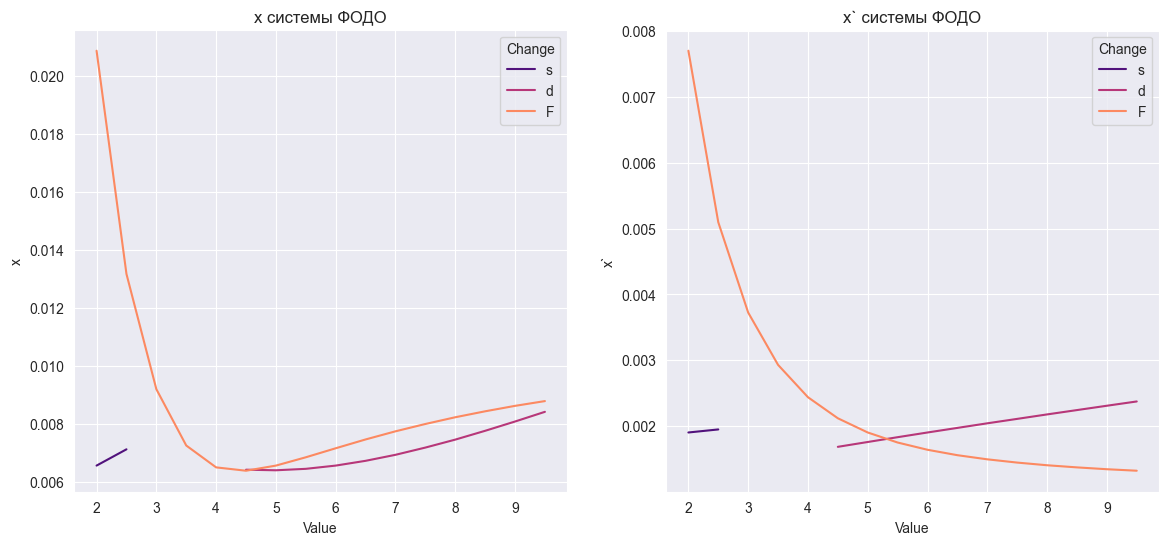

In [153]:
#Задача 5.в и 6.в.
Say='фофо'
my_export_period(Say, show=True)
Say='фодо'
my_export_period(Say, show=True)

Система линз ['Ф', 'О', 'Д', 'О'] Создана. Расчет значений:

Проверим условие фокусировки.
0<1.2<4 - выполняется
 Вот есть матрица перехода
[[ 0.1   7.05]
 [-0.12  1.54]]
Шпур у нее равен : 1.64
Параметр Флоке : 0.609385308030795
Параметр бетта : 12.31734683148254
Система линз ['Ф', 'О', 'Д', 'О'] Создана. Расчет значений:

Проверим условие фокусировки.
0<1.2<4 - выполняется
 Вот есть матрица перехода
[[ 0.22  5.73]
 [-0.12  1.42]]
Шпур у нее равен : 1.64
Параметр Флоке : 0.609385308030795
Параметр бетта : 10.011120190694319


[0.0061374932800459725, 0.0018590375924400486]

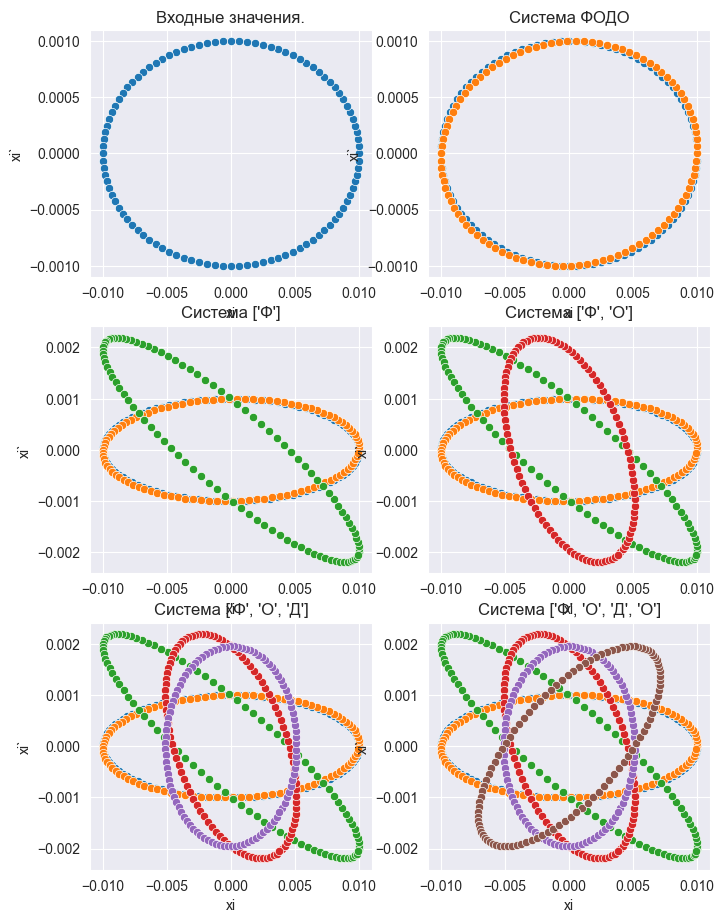

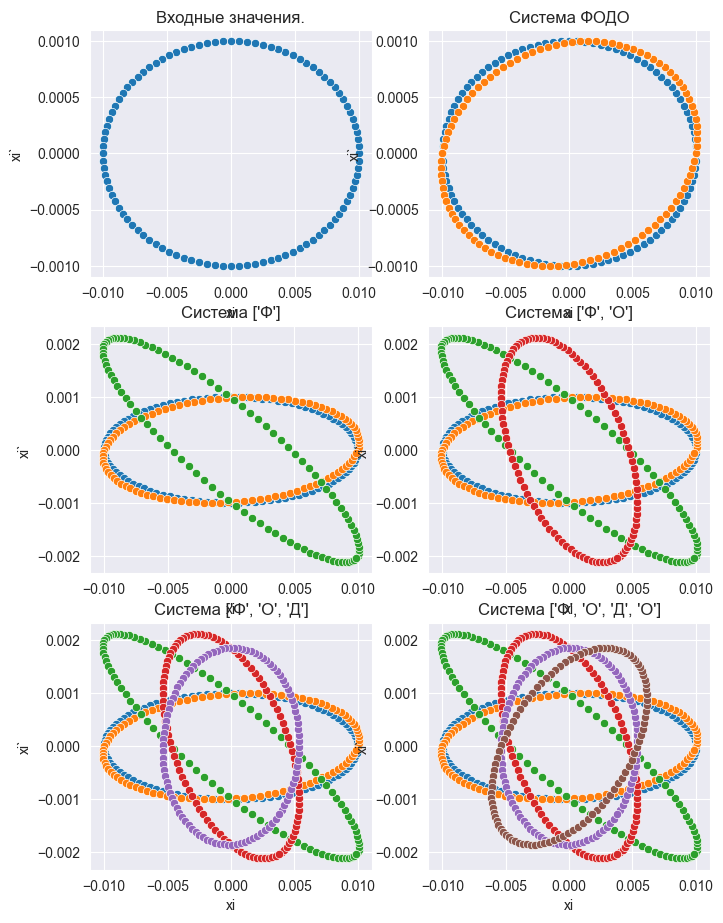

In [154]:
#Задание 6.а
Say='фодо'
period(Say,pictures=True, d=6,s=2.5) # В одном задании нужно покрутить значение s, чтобы убедиться, что шпур не зависит от него
period(Say,pictures=True, d=6,s=1.5)

[[1.57079633 1.        ]
 [1.57079633 2.        ]
 [1.57079633 0.5       ]
 [1.04719755 1.        ]
 [1.04719755 2.        ]
 [1.04719755 0.5       ]
 [0.78539816 1.        ]
 [0.78539816 2.        ]
 [0.78539816 0.5       ]
 [0.52359878 1.        ]
 [0.52359878 2.        ]
 [0.52359878 0.5       ]
 [3.14159265 1.        ]
 [3.14159265 2.        ]
 [3.14159265 0.5       ]]


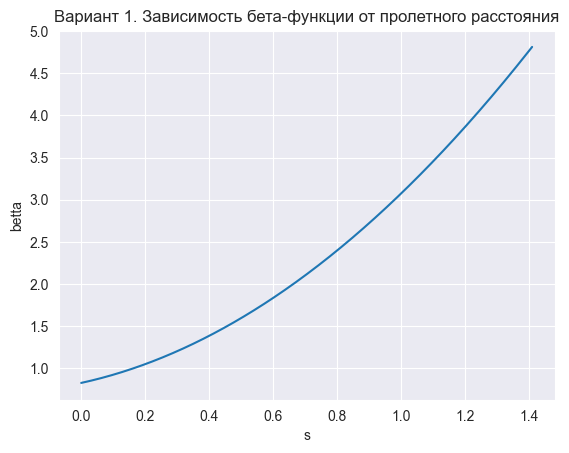

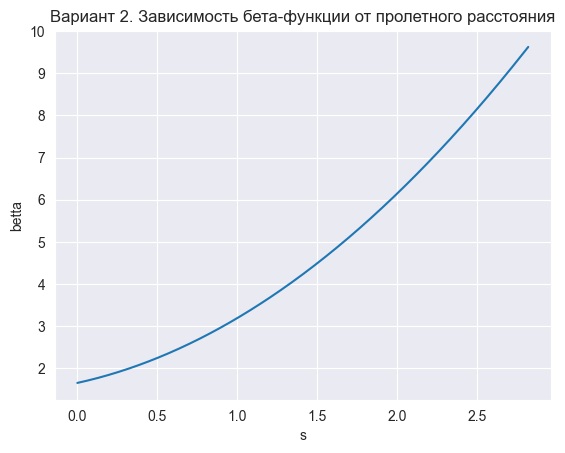

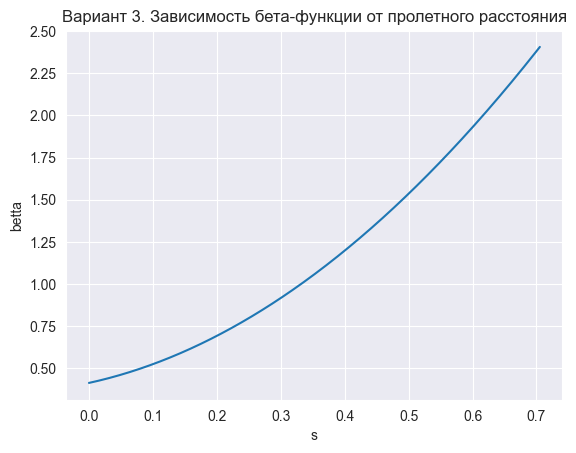

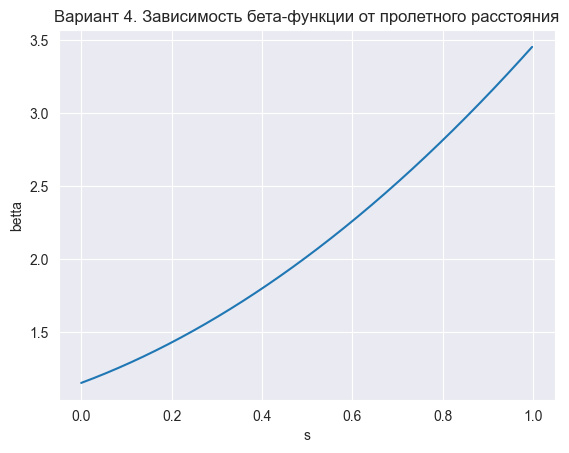

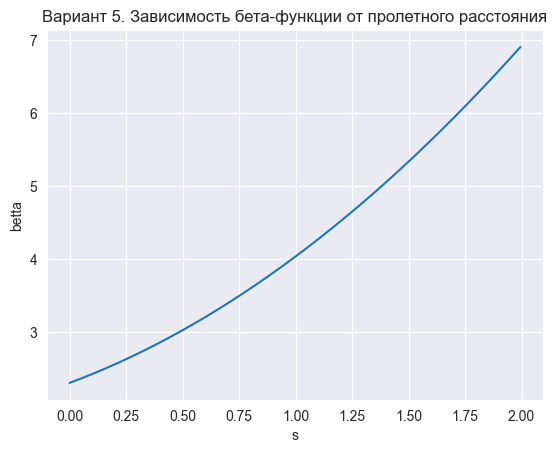

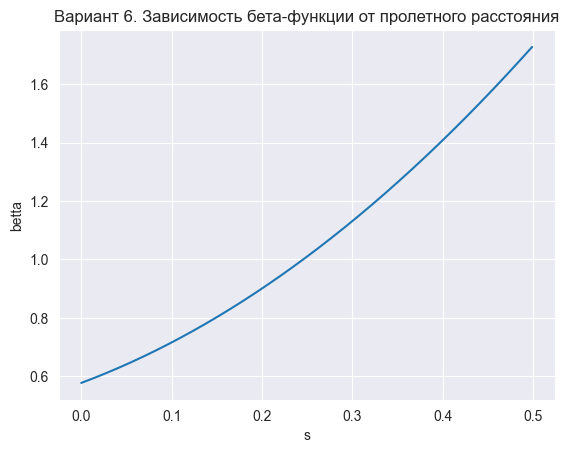

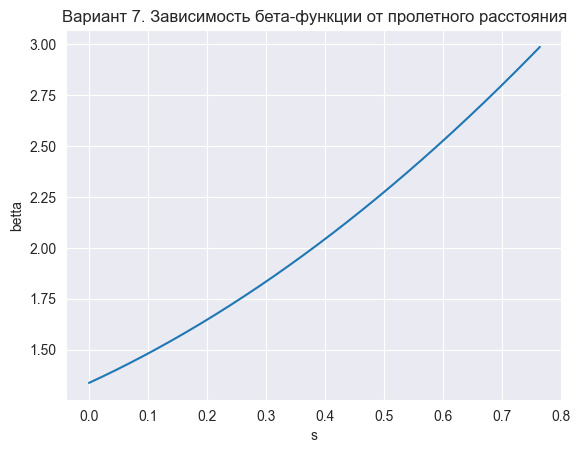

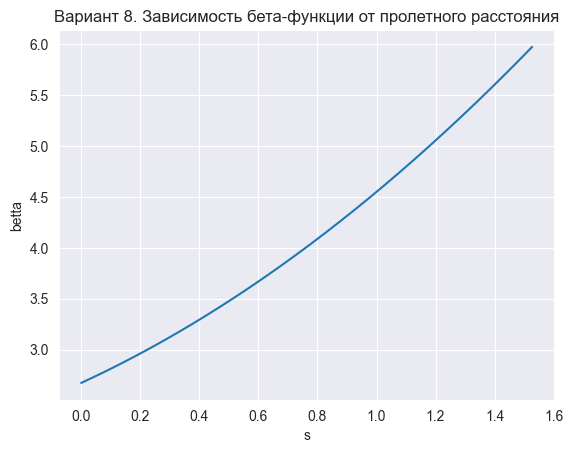

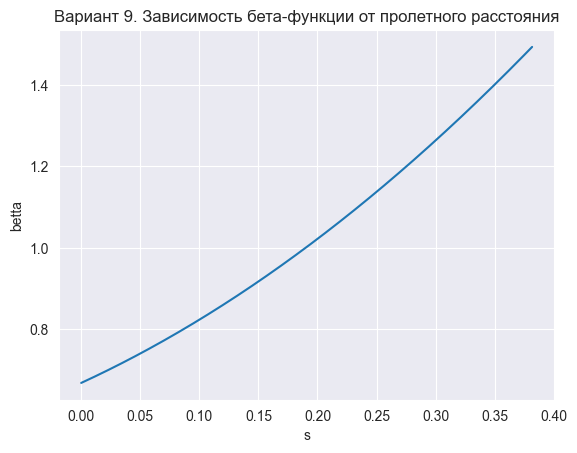

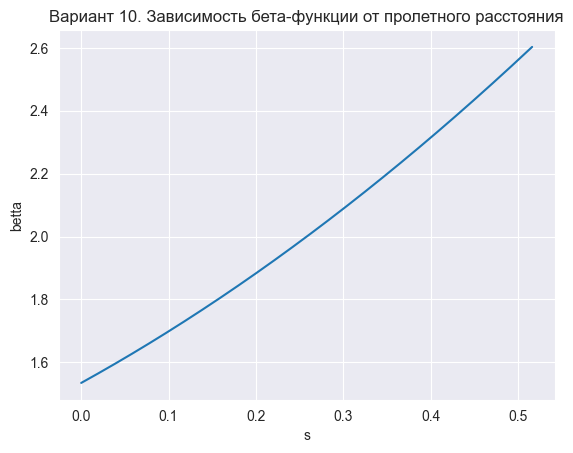

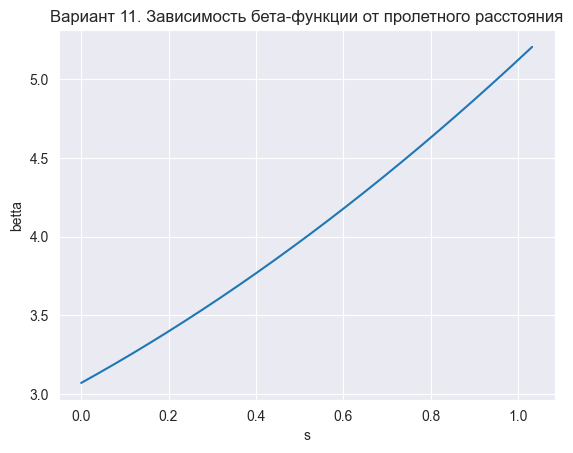

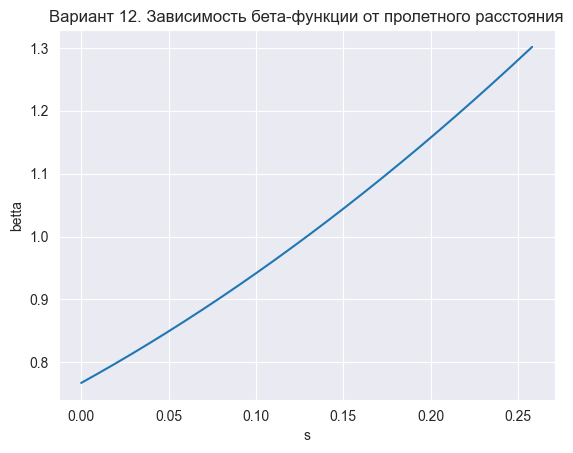

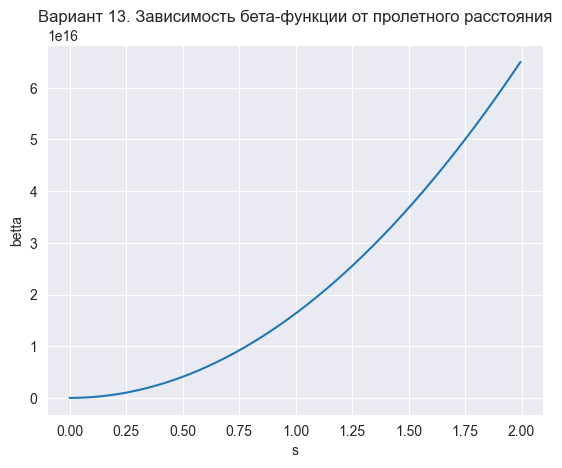

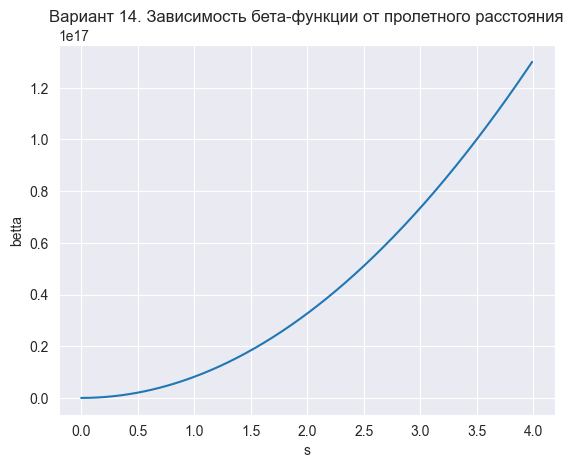

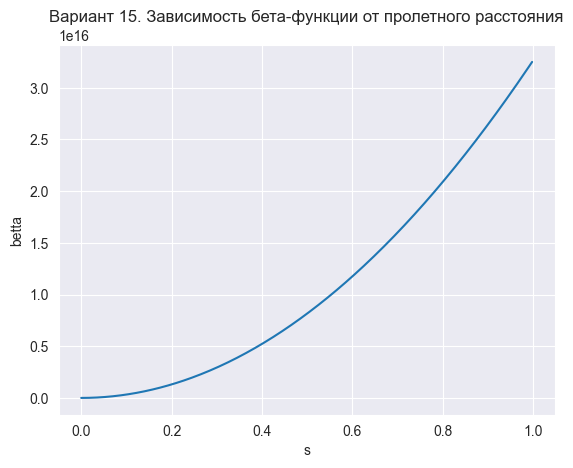

In [155]:
# Задание 6.г (автомат. подсчет)
# Сделать автоматический подсчет для всех вариантов
Variants=np.arange(30, dtype=float).reshape(15,2)

for i in range(15):
    if i<3:
        Variants[i][0]=math.pi/2
    elif i<6:
        Variants[i][0]=math.pi/3
    elif i<9:
        Variants[i][0]=math.pi/4
    elif i<12:
        Variants[i][0]=math.pi/6
    elif i<15:
        Variants[i][0]=math.pi
    
    if i%3==0:
        Variants[i][1]=1
    if i%3==1:
        Variants[i][1]=2
    if i%3==2:
        Variants[i][1]=0.5
print(Variants)
i=0
word='фодо'

''' 
Создадим папки от 1 до 15
'''
# png_path='Варианты для задачи 5.б/'
# for q in range(1,16):
#     os.mkdir(png_path+str(q))

    
for Floke,F in Variants:
    i+=1
    betta_func(Floke,F,word,i)
    
